The following exercises will guide you towards implementations of pricing tools for 
European options in the CRR-model.

Concerning the return of those exercises, please send an email with your jupyter (ipynb) file to either

          besslich@math.tu-berlin.de   or   rapsch@tu-berlin.de
          
until Wednesday, 20 November 2019, 12:15 p.m. Indicate your group members in the email.

**Setting** We consider the Cox-Ross-Rubinstein model with time horizon $T>0$.
Using the notation from the lecture, we assume
$$
	-1 < d < r < u.
$$
to make the model arbitrage-free and complete. We want to tackle the following tasks:

**Setting for Exercise 5.2.1**
    
Let $T=3$. Calculate the *Price*
$$
    P^{call}(0):=S^0(0)\mathbb{E}^{\mathbb{Q}}\left[\frac{(S^1(T)-K)_+}{(1+r)^T}\right]
$$
at time $t=0$ for the plain-vanilla call option
for parameters 
$$
    S^0(0)=1,\,\, S^1(0)=120,\,\, d=-0.5,\,\, u=0.5,\,\,  r=0.1,\,\,  K=120\,
$$
with unique martingale measure $\mathbb{Q}$.

**Setting for  Exercise 5.2.2**

Now we consider a so called *up-and-out-Call* with *knock-out* price $B$ ($B=200$).
This claim is a European Call on the asset $S^1$ with maturity $T$ and strike $K$ if
the asset price never exceeds the knock-out price $B$ within the time period $[0,T]$.
If, however, the asset price is larger than $B$ at any time point $t\in \{0,\ldots,T\}$,
the holder gets nothing.

a) Give a mathematical description of the discounted payoff of the
up-and-out call-option (in the notebook (see cell below)). 

b) Calculate the discounted price $P^{k.o.}(0)$.
 Use the same parameters as in 5.2.1 with $T=3$. Discuss your findings also for $T=2$ and $T=30$. 

     
**The goal of the programming exercise is to write Python code which does this computations for general $T$.**

# Toy example

For your convinience, let us give the following python code that calculates (not particularly efficiently) $C(0)$ from Exercise 5.2.1 for $T=1$.  

In [1]:
#In this cell we use the "Code"-environment to code something in python. 
#More precisley we just load all necessary packages.
import numpy as np 
#This package contains a lot of methods to implement mathoperations
#in a fast way
import matplotlib.pyplot as plt 
#This package is used for generating plots
from scipy.stats import bernoulli 
#This package is fast for simulating bernoulli random variables
from scipy.special import comb
#This package allows to compute n over k fast
import time 
#Used to stop the compution time
from scipy.stats import norm

In [2]:
#input variables:
S0 = 120
a = -0.5
b = 0.5
r = 0.1
B = 200
K = 120
T = 1
#Unique equivalent martingale measure:
p_star = (r-a)/(b-a)

### Calculating the price via the backwards formula from 5.1 iv)

In [3]:
#Backward formula of the expected value for T=1 only!!!
tic_1 = time.time()
pi_1 = p_star*max(S0*(1+b)-K,0)/(1+r)+(1-p_star)*max(S0*(1+a)-K,0)/(1+r)
toc_1 = time.time()
print( "The calculated value is %.2f." %(pi_1))
print("The time needed was %.5f seconds." %(toc_1-tic_1))

The calculated value is 32.73.
The time needed was 0.00000 seconds.


### Calculating the price via Monte Carlo

In [4]:
#The following function provides independent samples of the call at time T
def sample_call_value_one(a,b,S0,K,r,M):
    random_values = bernoulli.rvs(size=(M,1),p=p_star)
    up_moves = random_values*(1+b)
    down_moves = -1*(random_values-1)*(1+a)
    moves = up_moves+down_moves
    return ((np.maximum(S0*np.prod(moves, axis=1)-K,0))/(1+r)**1)  

The last calculated value is 32.72.
The time needed for the last run was 0.13047 seconds.


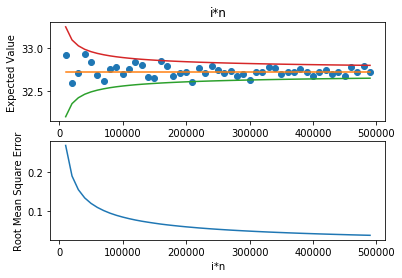

In [5]:
#Value of pi via Monte Carlo
n=10000
mc_values = 50
tic_2 = time.time()
x_values = []
pi_M = []
pi_M_RMSE = []
for i in range(1,mc_values,1):
    M=n*i
    if i == mc_values-1:
        tic_2 = time.time()    
    x_values.append([M])
    values_call = sample_call_value_one(a,b,S0,K,r,M)
    pi_M.append([np.mean(values_call)])
    pi_M_RMSE.append([np.sqrt(np.var(values_call,ddof=1))/np.sqrt(n*i)])
toc_2 = time.time()
print( "The last calculated value is %.2f." %(float(pi_M[len(pi_M)-1][0])))
print("The time needed for the last run was %.5f seconds." %(toc_2-tic_2))  
#The following will plot the calculated value for pi
plt.subplot(2, 1, 1)
plt.plot(x_values, pi_M, 'o')
plt.plot(x_values, [pi_1]*len(x_values), '-')
plt.plot(x_values, pi_1-1.96*np.array(pi_M_RMSE), '-')
plt.plot(x_values, pi_1+1.96*np.array(pi_M_RMSE), '-')
plt.title('i*n')
plt.ylabel('Expected Value')
#The following will plot the root mean square error
plt.subplot(2, 1, 2)
plt.plot(x_values, pi_M_RMSE, '-')
plt.xlabel('i*n')
plt.ylabel('Root Mean Square Error')
plt.show()    

# Exercise 5.2.1 (4 points)

Calculate the searched Price of Exercise 5.2.1 above for $T=3$ (rather than $T=1$ as assumed 
in the code above) via jupyther in three ways:

    1. Use the backwards algorithm.
    
    2. Via a combinatorial argument.

    3. Use Monte-Carlo Simulation, stop the time and plot your results as in the toy example.
    
    4. Why did we not ask you to implement explicit integration over $\Omega=\{-1,1\}^T$ here? Compare in general the numerical complexity, when T=50, for all of the above methods.
    
    
   
Next you should calculate the call option price in the **$N$-step CRR model**
($N \in \mathbb{N}$). Specifically, we want to investigate the
convergence of the computed prices to the prices obtained by the
corresponding limiting *Black-Scholes pricing formula* as the
number of time steps $N$ becomes large. 

The $N$-step CRR model with time step $T/N$ for $T = 1$, riskless interest rate $r=0$ (for simplicity) and risky asset
$S^{(N)}$ whose dynamics are described by
\begin{equation*}
S^{(N)}_0 := (S^{(N)})^1(0):=s:= 100 > 0, \quad S^{(N)}_k:=(S^{(N)})^1(k):= s \prod_{i=1}^k (1 + R^{(N)}_i) \quad (k=1,\ldots,N),
\end{equation*}
where $1+R^{(N)}_k$, $k=1,\ldots,N$, takes the values
\begin{equation*}
d_N := e^{-0.3 \sqrt{T/N}} \quad \text{and} \quad u_N :=
e^{0.3 \sqrt{T/N}}.
\end{equation*}
Furthermore the martingale
measure $\mathbb{Q}$ with respect to the filtration
$(\sigma(R^{(N)}_1,\ldots, R^{(N)}_n))_{n=1,\ldots,N}$ is given by
\begin{equation*}
  q_N :=\mathbb{Q}[R^{(N)}_k = b_N] = \frac{1-d_N}{u_N - d_N}, \quad
  1-q_N =\mathbb{Q}[R^{(N)}_k = a_N] = \frac{u_N - 1}{u_N - d_N} \quad (k=1,\ldots,N),
\end{equation*}
where $R^{(N)}_k$ $(k=1,2,\ldots)$ are i.i.d. under $\mathbb{Q}$. Note that
the (time discrete) price process of the risky asset
$(S_k^{(N)})_{k=0,1\ldots,N}$ can be discretized *in space* via
the formula
\begin{equation}
  S^{i,N}_k := s d_N^{k-i} u_N^{i}, \quad 0 \leq i \leq k, \quad 0 \label{disc}
  \leq k \leq N,
\end{equation}
where $i$ denotes the number of upward movements until time step
$k$.    

5. Implement the backwards recursion algorithm from 5.1 iv) which allows you to compute the arbitrage-free price $P^{put,(N)}(0)$ at time t = 0 of a European put option with strike K = 90 in the above N-step CRR model with step sizes $$N = 50,60,70,...,1980,1990,2000.$$ Plot the deviation of the computed prices $(P^{put,(N)}(0))_{N =50,60,...,2000}$ from the price obtained by using the corresponding limiting Black-Scholes pricing formula for put options, i.e.
$$
    P^{Put}(s,K,r=0,T=1,\sigma=0.3)=K\mathrm{e}^{-rT}\Phi(-\mathrm{d}_-(s,K,r,T,\sigma))-s\Phi(-\mathrm{d}_+(s,K,r,T,\sigma))
$$
with
$$
    \mathrm{d}_\pm(s,K,r,T,\sigma):=\frac{\mathrm{ln}\left(\frac{s}{K}\right)+\left(r\pm\frac12\sigma^2\right)T}{\sigma\sqrt{T-t}}.
$$
What do you observe?









For your convenience, see below the code lines that demand your attention.

In [16]:
T = 30

## Backward formula for arbitrary $T$ (5.2.1 1.)

In [17]:
#backward formula of the expected value for general T
tic_1 = time.time()
#start the time
asset_val = S0*((1+b)**np.arange(T,-1,-1))*((1+a)**np.arange(0,T+1,1))
#Vector which contains all possible outcomes of the asset at T
call_val = np.maximum(asset_val-K,0)/(1+r)**T
#Vector which contains all possible outcomes of the call at T
#Using the recursion formula for pricing in the CRR model:
for t in np.arange(T,0,-1):
    call_val[0:t] = p_star*call_val[0:t]+(1-p_star)*call_val[1:t+1]
pi_1 = call_val[0]
toc_1 = time.time()
#Ending the timer
print( "The calculated value is %.4f." %(pi_1))
print("The time needed was %.12f seconds." %(toc_1-tic_1))

The calculated value is 116.5178.
The time needed was 0.000000000000 seconds.


## Combinatorial argument for arbitrary $T$ (5.2.1 2.)

In [18]:
#Combinatorial argument from Exercise sheet 5.1 (vi)
tic_comb = time.time()
#start the time
asset_val = S0*((1+b)**np.arange(T,-1,-1))*((1+a)**np.arange(0,T+1,1))
pi_comb = 0
for i in range(T,-1,-1):
    pi_comb += comb(T, i)*p_star**i*(1-p_star)**(T-i)*(np.maximum(asset_val[T-i]-K,0)/(1+r)**T)
toc_comb = time.time()
#Ending the timer
print( "The calculated value is %.4f." %(pi_comb))
print("The time needed was %.12f seconds." %(toc_comb-tic_comb))

The calculated value is 116.5178.
The time needed was 0.015622854233 seconds.


## Monte Carlo for arbitrary $T$ (5.2.1 3.)

In [13]:
#The following function provides independent samples of the call at time T
def sample_call_value(T,a,b,S0,K,r,M):
    random_values = bernoulli.rvs(size=(M,T),p=p_star)
    up_moves = random_values*(1+b)
    down_moves = -1*(random_values-1)*(1+a)
    moves = up_moves+down_moves
    return ((np.maximum(S0*np.prod(moves, axis=1)-K,0))/(1+r)**T)  

The last calculated value is 111.50.
The time needed for the last run was 1.25639 seconds.


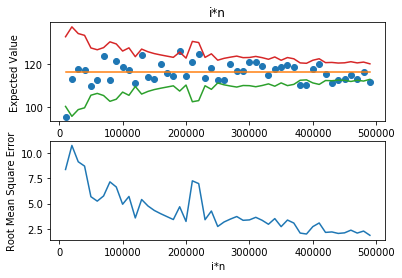

In [19]:
#Value of pi via Monte Carlo
n=10000
mc_values = 50
tic_2 = time.time()
x_values = []
pi_M = []
pi_M_RMSE = []
for i in range(1,mc_values,1):
    M=n*i
    if i == mc_values-1:
        tic_2 = time.time()    
    x_values.append([M])
    values_call = sample_call_value(T,a,b,S0,K,r,M)
    pi_M.append([np.mean(values_call)])
    pi_M_RMSE.append([np.sqrt(np.var(values_call,ddof=1))/np.sqrt(n*i)])
toc_2 = time.time()
print( "The last calculated value is %.2f." %(float(pi_M[len(pi_M)-1][0])))
print("The time needed for the last run was %.5f seconds." %(toc_2-tic_2))  
#The following will plot the calculated value for pi
plt.subplot(2, 1, 1)
plt.plot(x_values, pi_M, 'o')
plt.plot(x_values, [pi_1]*len(x_values), '-')
plt.plot(x_values, pi_1-1.96*np.array(pi_M_RMSE), '-')
plt.plot(x_values, pi_1+1.96*np.array(pi_M_RMSE), '-')
plt.title('i*n')
plt.ylabel('Expected Value')
#The following will plot the root mean square error
plt.subplot(2, 1, 2)
plt.plot(x_values, pi_M_RMSE, '-')
plt.xlabel('i*n')
plt.ylabel('Root Mean Square Error')
plt.show()    

## 5.2.1 4.

In [21]:
print( "The calculated value with the backwards scheme was %.4f and it took %.12f seconds." %(pi_1,toc_1-tic_1))
print( "The calculated value with the combinatorial scheme was %.4f. and it took %.12f seconds." %(pi_comb,toc_comb-tic_comb))
print( "The calculated value with the Monte Carlo scheme was %.4f and it took %.12f seconds with RMSE of %.4f." %(float(pi_M[len(pi_M)-1][0]),toc_2-tic_2,float(pi_M_RMSE[len(pi_M)-1][0])))

The calculated value with the backwards scheme was 116.5178 and it took 0.000000000000 seconds.
The calculated value with the combinatorial scheme was 116.5178. and it took 0.015622854233 seconds.
The calculated value with the Monte Carlo scheme was 111.4963 and it took 1.256385326385 seconds with RMSE of 1.8609.


### Pricing in the N-step CRR model (5.)

In [22]:
##########    Setting                                        ##########

S0 = 100
K = 90
sigma = 0.3
T = 1

steps =np.arange(50,2001,10)

#N = 10000
#timestep = np.arange(N,N+1)

##########    Price of the Put Option via CRR model          ##########

#Starting the timer
tic = time.time()

#Calculating the quantities of the CRR model
delta = T/steps
u = np.exp(sigma*np.sqrt(delta))
d = np.exp(-sigma*np.sqrt(delta))
p = (1-d)/(u-d)
q = 1-p
n = np.size(delta)

Put_value = [];

for it in np.arange(0,n,1):
    #Vector which contains all possible outcomes of the asset
    SN = S0*(u[it]**np.arange(steps[it],-1,-1))*(d[it]**np.arange(0,steps[it]+1,1))
    #Vector which contains all possible outputs of the put
    P = np.maximum(K-SN,0)
    #Using the recursion formula for pricing in the CRR model
    for t in np.arange(steps[it],0,-1):
        P[0:steps[it]] = p[it]*P[0:steps[it]]+q[it]*P[1:steps[it]+1]
      
    Put_value.append(P[0])       

#Ending the timer and printing the result
toc = time.time()
comp_time = toc - tic
print ("The computational time was %f seconds and the last approximated value is %f."
       %(comp_time,Put_value[n-1]))

##########    Price of the Put Option via formula           ##########

#Starting the timer
tic_2 = time.time()

#Incredients of the Black sholes formula
d1 = (np.log(S0/K) + 0.5*sigma**2*T)/(sigma*np.sqrt(T));
d2 = d1 - sigma*np.sqrt(T);

#Black sholes formula for the Put
BS_val_Put = K*norm.cdf(-d2)-S0*norm.cdf(-d1)

#End timer for the formula calculation
toc_2 = time.time()
comp_time_2 = toc_2 - tic_2

##########    Comparison outputs    ########

print ("The value of the put computed with the formula is %f and it took %f seconds." 
       %(BS_val_Put,comp_time_2))

print ("The error between those two is %f and the time difference was %f seconds." 
       %(np.abs(Put_value[n-1]-BS_val_Put),comp_time-comp_time_2))

The computational time was 2.714958 seconds and the last approximated value is 7.012824.
The value of the put computed with the formula is 7.012880 and it took 0.003998 seconds.
The error between those two is 0.000056 and the time difference was 2.710961 seconds.


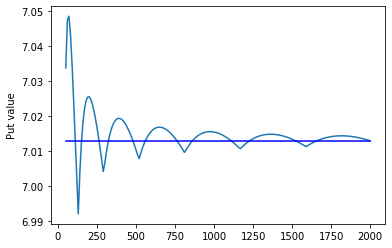

In [23]:
%matplotlib inline

plt.plot(steps, Put_value, steps, [BS_val_Put]*len(Put_value), 'b-')
plt.ylabel('Put value')
plt.show()

## Exercise 5.2.2 (4 points)

See explanation above.

Note that you will have to specify a computationaly reasonable backwards scheme and a suitable Monte Carlo sampling routine.

## 5.2.2 1.

The payoff of the knock-out option is given by
$$
    \xi^{\text{k.o.}}=\frac{(S^1(T)-K)_+}{(1+r)^T}\mathbb{1}_{\{\sup_{v\in \{0,\dots,T\}}S^1(v)\leq B\}}.
$$

## 5.2.2 2.

In [28]:
S0 = 120
a = -0.5
b = 0.5
r = 0.1
B = 200
K = 120
T = 300
#Unique equivalent martingale measure:
p_star = (r-a)/(b-a)

## Backward formula for arbitrary $T$

In [29]:
#backward formula of the expected value for general T
tic_1 = time.time()
#start the time
asset_val = S0*((1+b)**np.arange(T,-1,-1))*((1+a)**np.arange(0,T+1,1))
#Vector which contains all possible outcomes of the asset
asset_val[asset_val>B] = 0
call_val = np.maximum(asset_val-K,0)
#Vector which contains all possible outputs of the knock-out call
#Next we use the recursion formula for pricing in the CRR model:
for t in np.arange(T-1,-1,-1):
    asset_val_temp = S0*((1+b)**np.arange(t,-1,-1))*((1+a)**np.arange(0,t+1,1))
    asset_val_temp[asset_val_temp<=B] = 1
    asset_val_temp[asset_val_temp>B] = 0    
    call_val[0:t+1] = np.multiply(p_star*call_val[0:t+1]/(1+r)+(1-p_star)/(1+r)*call_val[1:t+2],asset_val_temp)
pi_1 = call_val[0]
toc_1 = time.time()
#Ending the timer
print( "The calculated value is %.4f." %(pi_1))
print("The time needed was %.4f seconds." %(toc_1-tic_1))

The calculated value is 0.0000.
The time needed was 0.0156 seconds.


## Combinatorial formula for arbitrary $T$

Not possible here!

## Monte Carlo for arbitrary $T$

In [26]:
#The following function provides independent samples of the knock-out option at time T
def sample_knockoutcall_value(T,a,b,S0,K,r,B,M):
    value = S0*np.ones((M,1))
    for t in np.arange(T-1,-1,-1):
        random_values = bernoulli.rvs(size=(M,1),p=p_star)
        up_moves = random_values*(1+b)
        down_moves = -1*(random_values-1)*(1+a)
        value = np.multiply(value,up_moves+down_moves)
        value[value > B] = 0
    return (np.maximum(value-K,0)/((1+r)**T))    

In [ ]:
#Value of pi via Monte Carlo
n=10000
mc_values = 50
tic_2 = time.time()
x_values = []
pi_M = []
pi_M_RMSE = []
for i in range(1,mc_values,1):
    M=n*i
    if i == mc_values-1:
        tic_2 = time.time()    
    x_values.append([M])
    values_call = sample_knockoutcall_value(T,a,b,S0,K,r,B,M)
    pi_M.append([np.mean(values_call)])
    pi_M_RMSE.append([np.sqrt(np.var(values_call,ddof=1))/np.sqrt(n*i)])
toc_2 = time.time()
print( "The last calculated value is %.4f." %(float(pi_M[len(pi_M)-1][0])))
print("The time needed for the last run was %.5f seconds." %(toc_2-tic_2))  
#The following will plot the calculated value for pi
plt.subplot(2, 1, 1)
plt.plot(x_values, pi_M, 'o')
plt.plot(x_values, [pi_1]*len(x_values), '-')
plt.plot(x_values, pi_1-1.96*np.array(pi_M_RMSE), '-')
plt.plot(x_values, pi_1+1.96*np.array(pi_M_RMSE), '-')
plt.title('i*n')
plt.ylabel('Expected Value')
#The following will plot the root mean square error
plt.subplot(2, 1, 2)
plt.plot(x_values, pi_M_RMSE, '-')
plt.xlabel('i*n')
plt.ylabel('Root Mean Square Error')
plt.show()    